In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# import sys
# sys.path.append(r'C:\Users\justink\Code\dro')

import dro.utilities as dro
import dro.plotting_functions as dro_plots

failed to import CV2 in core.utilities
failed to import mask in core.jcamdata.py
failed to import get_mask_dict_gui in core.epoch.py
failed to import aibs.Analysis.Core.smooth
failed to import mask relalated functions in __init__.py


/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Load data

In [5]:
from braintv_pilot.cohorts import mouse_info
mouse_df = cohort_assignment['mouse'].apply(lambda mouse: pd.Series(mouse_info(mouse)))
cohort_assignment = cohort_assignment.merge(
    mouse_df,
    how='left',
    left_on='mouse',
    right_on='mouse_id'
)

In [6]:
from braintv_pilot.latest import copy_latest, local_dir
# copy_latest()
df = dro.load_from_folder(local_dir)

error loading file 161107125855-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M276600.pkl: 
Loading /local1/Projects/braintv_behavior_piloting/braintv_pilot/../data/raw/161130130016-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250786.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_pilot/../data/raw/161201143628-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M258173.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_pilot/../data/raw/161201094817-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M272465.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_pilot/../data/raw/161130122923-task=DoC_Gratings_multi_ori_multi_contrast_stage=2_LickDetectTraining_mouse=M250783.pkl
Loading /local1/Projects/braintv_behavior_piloting/braintv_pilot/../data/raw/161129101643-task=DetectionOfChange_Gratings_stage=2_LickDetectTraining_mouse=M271966.pkl
Loading /local1/Projects/braintv

In [7]:

def get_training_day(df_in):
    '''adds a column to the dataframe with the number of unique training days up to that point
         '''

    training_day_lookup = {}
    for key, group in df_in.groupby(['mouse_id',]):
        dates = np.sort(group['date'].unique())
        training_day_lookup[key] = {date:training_day for training_day,date in enumerate(dates)}
        print key,dates
    return df_in.apply(lambda row: training_day_lookup[row['mouse_id']][row['date']],axis=1)

df['training_day'] = get_training_day(df)

#df['day_of_week'] = df.startdatetime.dt.weekday_name

## build arrays for change detection

# df['change'] = ~df['change_frame'].isnull()
df['change'] = df['trial_type']=='go'
df['detect'] = (df['response']==1.0) #| (df['trial_type']=='aborted')

## calculate reaction times

df['reaction_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else np.nan)
df['reaction_time'] = df.apply(lambda row: row['reaction_time'] - row['change_time'],axis=1)

## unwrap the response window
df['response_window_lower'] = df['response_window'].map(lambda x: x[0])
df['response_window_upper'] = df['response_window'].map(lambda x: x[1])


M246782 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
M249123 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20']
M250783 ['2016-08-22' '2016-08-23' '2016-08-24' '2016-08-25' '2016-08-26'
 '2016-08-29' '2016-08-30' '2016-08-31' '2016-09-02' '2016-09-06'
 '2016-09-07' '2016-09-08' '2016-09-09' '2016-09-12' '2016-09-13'
 '2016-09-14' '2016-09-15' '2016-09-16' '2016-09-19' '2016-09-20'
 '2016-09-21' '2016-09-22' '2016-09-23' '2016-09-26' '2016-09-27'
 '2016-09-28' '2016-09-29' '2016-09-30' '2016-10-03' '2016-10-05'
 '2016-10-06' '2016-10-07' '2016-10-10' '2016-10-11' '2016-10-1

In [8]:
cohort_assignment.head()

,mouse,experiment,cohort,day_zero,baselineweight,birthdate,dayonescript,driver1,driver2,group,...,minweight,mouse_id,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,M272464,visual_behavior_development,4,2016-10-31,20.2,2016-08-24,,None,None,EMX-Cre-Ai35,...,85,M272464,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
1,M271733,visual_behavior_development,4,2016-10-31,20.4,2016-08-01,,None,None,Nr5a1,...,85,M271733,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
2,M271728,visual_behavior_development,4,2016-10-31,23.0,2016-08-01,,None,None,Nr5a1,...,85,M271728,Additional information...,sissyc,None,Male,None,None,sissyc,2016-10-21
3,M276951,visual_behavior_development,4,2016-10-31,20.8,2016-08-27,,None,None,Emx-IRES-Cre;Ai95(NC),...,85,M276951,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21
4,M276950,visual_behavior_development,4,2016-10-31,20.4,2016-08-27,,None,None,EMX-Cre-Ai35,...,85,M276950,Additional information...,sissyc,None,Female,None,None,sissyc,2016-10-21


In [9]:
df[['change_contrast','initial_contrast']].dropna().drop_duplicates()

,change_contrast,initial_contrast
161748,1.00,1.00
376514,0.16,0.16
376515,0.32,0.32
376523,0.64,0.64


In [11]:
df = df.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)

In [12]:
def rectify_angle(angle):
    if np.isnan(angle):
        return 0.0
    else:
        angle = angle % 180
        return abs(min(
            angle,
            180 - angle
        ))

df['orientation_delta'] = df['change_ori'] - df['initial_ori']
df['orientation_delta'] = df['orientation_delta'].map(rectify_angle)
df['orientation_delta_log'] = df['orientation_delta'].map(np.log10).replace(-np.inf,0.001)

/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/pandas/core/series.py:2175: RuntimeWarning: divide by zero encountered in log10
  new_values = map_f(values, arg)


In [13]:
df[df.trial_type=='aborted']['orientation_delta'].unique()

array([ 0.])

In [14]:
from behaviorist import metrics

In [15]:
def compute_metrics(group):
    result = {
        'd-prime': metrics.discrim(group,'change','detect',metric=metrics.d_prime),
        'discrim_p': metrics.discrim(group,'change','detect',metric=metrics.discrim_p),
        'response_bias': metrics.response_bias(group,'detect'),
        'earned_water': metrics.earned_water(group), 
        'total_water': metrics.total_water(group), 
        'num_trials': metrics.num_trials(group),
        'num_contingent_trials': metrics.num_contingent_trials(group),
        'reaction_time_50th%ile': metrics.reaction_times(group,percentile=50),
        'reaction_time_05th%ile': metrics.reaction_times(group,percentile=5),
        'reaction_time_95th%ile': metrics.reaction_times(group,percentile=95),
        'num_orientations': len(group['orientation_delta'].dropna().unique()),
    }
    
    return pd.Series(result, name='metrics')

water = df.groupby(['mouse_id','training_day']).apply(compute_metrics).reset_index()
water['frac_earned_water'] = water['earned_water'] / water['total_water']
water['reaction_time_spread'] = water['reaction_time_95th%ile'] - water['reaction_time_05th%ile']

water = water.merge(
    cohort_assignment,
    how='left',
    on='mouse_id',
)
water['baselineweight'] = water['baselineweight'].astype(float)

water.head()

/home/justink/Code/behaviorist/behaviorist/metrics.py:15: RuntimeWarning: invalid value encountered in double_scalars
  FAR = fp / (tn + fp)
/home/justink/Code/behaviorist/behaviorist/metrics.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return behav_df[mask][(behav_df['reward_times'].map(len)>0)]['reward_volume'].sum()


,mouse_id,training_day,d-prime,discrim_p,earned_water,num_contingent_trials,num_orientations,num_trials,reaction_time_05th%ile,reaction_time_50th%ile,...,iacuc_protocol,minweight,mousenotes,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate
0,M246782,0,NaN,1.000000,1.092,156.0,2.0,157.0,-5.020008,0.334217,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
1,M246782,1,-0.057545,0.946458,0.354,356.0,2.0,1563.0,0.161557,1.286406,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
2,M246782,2,-0.803594,0.076643,0.198,117.0,2.0,394.0,0.208261,1.360493,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
3,M246782,3,-0.025337,0.783441,0.276,186.0,2.0,426.0,0.087997,1.401724,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12
4,M246782,4,-0.262469,0.681377,0.530,179.0,2.0,423.0,0.150696,1.343656,...,1406,85,Additional information...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12


In [16]:
import numpy as np

In [17]:
class LastWaterTime():
    """
    
    """
    def __init__(self):
        self.last_time = {}
    def check(self,row):
        key = (row['mouse_id'],row['training_day'])
        
        # first let's hang on to the last time to return later
        try:
            last_time = self.last_time[key]
        except KeyError:
            self.last_time[key] = np.nan
            last_time = self.last_time[key]
        
        # if they were rewarded this time, let's update the value
        if len(row['reward_times'])>0:
            self.last_time[key] = row['starttime']
            
        # now we return the old value
        return last_time

In [18]:
df.sort_values('starttime',inplace=True)
df['last_water_time'] = df.apply(LastWaterTime().check,axis=1)

In [19]:
df['change_time_tr'] = df['change_time'] - df['starttime']

df['wait_time'] = df['lick_times'].map(lambda x: x[0] if len(x)>0 else None) - df['starttime']
df['time_since_last_water'] = df['starttime'] - df['last_water_time']

df['time_since_last_water_log'] = df['time_since_last_water'].map(np.log10)

In [20]:
# good_mouse = 'M258274'
good_mouse = 'M250786'

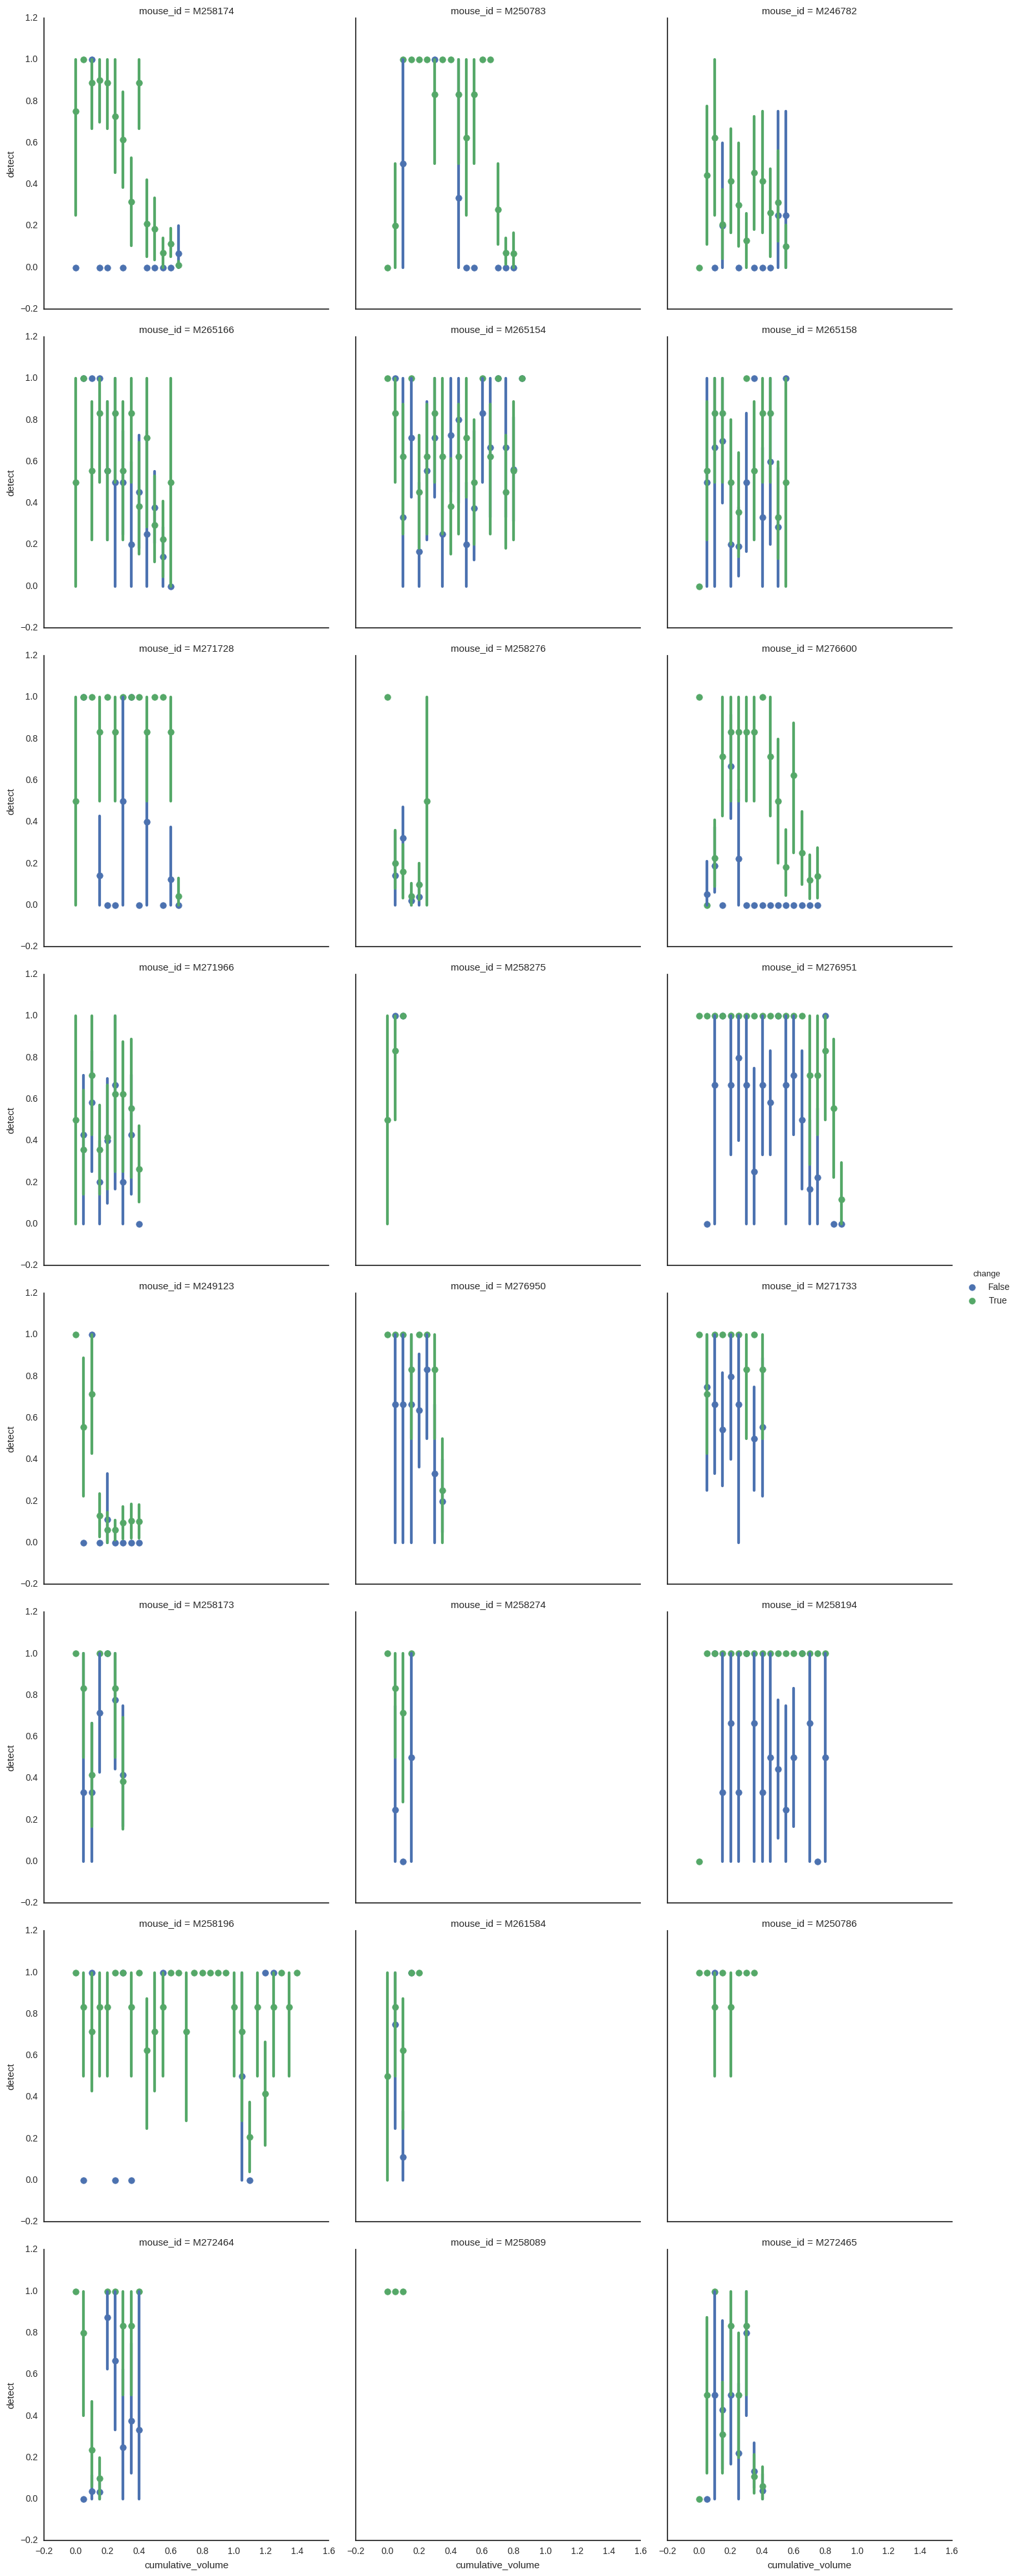

In [21]:
data = df[
#     (df.mouse_id==good_mouse)
    df.trial_type.isin(('go','catch'))
    & (df.training_day ==6)
]

sns.lmplot('cumulative_volume','detect',
           data=data,
#            logistic=True,
           hue='change',
           col='mouse_id',
           col_wrap=3,
           x_bins=np.arange(0,df.cumulative_volume.max(),0.05),
           fit_reg=False,
)
# plt.xlim(0,3)

In [22]:
df['success'] = (df['trial_type']=='go') & (df['detect'])
df['failure'] = (df['trial_type']!='go') & (df['detect'])

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
from patsy import dmatrices
from sklearn import linear_model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df['contrast'] = df['change_contrast'].fillna(1.0)

In [27]:
def compute_strategy(behav_df):
    
    df = behav_df.copy(deep=True)
    
    for factor in ('success','failure','detect'):
        df['prior_{}'.format(factor)] = (
            df[factor]
            .rolling(center=False,window=2)
            .apply(func=lambda x: x[0]==True)
            )
    df['prior_cumulative_volume'] = (
            df['cumulative_volume']
            .rolling(center=False,window=2)
            .apply(func=lambda x: x[0])
            )
    
    candidate_predictors = [
#         'prior_success',
#         'prior_failure',
        'prior_detect',
        'prior_cumulative_volume',
        'starttime',
        'time_since_last_water_log',
        'contrast',
#         'hour',
#         'dayofweek',
        
    ]
    
    predictors = [p for p in candidate_predictors if len(df[p].unique())>1]
    predictors.append('orientation_delta_log')
#     print predictors,df['contrast'].unique(),len(df['contrast'].unique()>1)
    
    df = df[['detect',]+predictors].dropna().apply(pd.to_numeric)
    df['detect'] = df['detect'].astype(int)
    
    # z-score the predictors
    for col in predictors:
        df[col] = (df[col] - df[col].mean())/df[col].std(ddof=0)

    #train logistic regression
    formula = 'detect ~ ' + ' + '.join(predictors)
    y, X = dmatrices(formula,df)
    
    formula2 = 'detect ~ orientation_delta_log'
    yo, Xo = dmatrices(formula2,df)
        
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5)
    
    Xo_train, Xo_test, yo_train, yo_test = train_test_split(
        Xo, yo, test_size=0.5)
    
    results = {k:None for k in candidate_predictors+['Intercept']}
    
    try:
        logreg = linear_model.LogisticRegression(
            C=0.35, #chosen based on median of LogisticRegressionCV on all sessions
            penalty = 'l1',
            class_weight = 'balanced',
        )
        logreg.fit(X_train,y_train)
        results.update(
            {k:v for k,v in zip(X.design_info.column_names,logreg.coef_[0])}
            )

        y_pred = logreg.predict(X_test)
        results.update(dict(
            score=logreg.score(X_test,y_test),
            p=metrics.discrim_p(y_pred,y_test),
            )
        )
        
        # orientation-only
        logreg.fit(Xo_train,yo_train)
        results.update(
            {'{}_o'.format(k):v for k,v in zip(Xo.design_info.column_names,logreg.coef_[0])}
            )

        yo_pred = logreg.predict(Xo_test)
        results.update(dict(
            score_o=logreg.score(Xo_test,yo_test),
            p_o=metrics.discrim_p(yo_pred,yo_test),
            )
        )
        
        return pd.Series(results,name='results')
    
    
    except ValueError:
        return None

In [28]:
results = compute_strategy(df)
print results

/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept                   -0.714156
Intercept_o                 -0.679449
contrast                     0.042471
orientation_delta_log        1.261348
orientation_delta_log_o      1.264312
p                            0.000000
p_o                          0.000000
prior_cumulative_volume      0.014170
prior_detect                 0.011569
score                        0.850549
score_o                      0.847757
starttime                   -0.085863
time_since_last_water_log   -0.437539
Name: results, dtype: float64


In [29]:
strategy = (
    df[df.trial_type.isin(['go','catch'])]
    .groupby(['mouse_id','dayofweek','training_day'])
    .apply(compute_strategy)
    .reset_index()
    )
strategy.head(5)

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,prior_cumulative_volume,prior_detect,score,score_o,starttime,time_since_last_water_log
0,M246782,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M246782,0,5,0.000000,0.000000,NaN,0.000000,0.000000,6.510140e-01,1.000000,0.000000,0.000000,0.555556,0.703704,0.000000,-0.014185
2,M246782,0,13,-0.167493,-0.035178,NaN,0.000000,0.456758,4.366607e-01,0.296117,0.000000,0.402809,0.616162,0.141414,0.546087,0.025992
3,M246782,0,18,0.000000,0.000000,NaN,0.090307,0.493471,1.895906e-01,0.037047,0.467561,0.000000,0.727273,0.818182,0.000000,0.000000
4,M246782,1,1,-0.029085,0.000000,NaN,0.000000,-0.027207,1.881214e-09,0.868791,0.000000,0.305754,0.820225,0.780899,-0.006747,-1.209970


In [30]:
strategy = pd.merge(strategy,water,on=['mouse_id','training_day'])

p_thresh = 0.05
strategy['stimulus_control'] = (strategy['discrim_p'] < p_thresh) & (strategy['d-prime'] > 0.5)
strategy['model_significant'] = strategy['p'] < p_thresh
strategy['model_significant_o'] = strategy['p_o'] < p_thresh
strategy.head()

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,...,owner,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate,stimulus_control,model_significant,model_significant_o
0,M246782,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,False,False
1,M246782,0,5,0.000000,0.000000,NaN,0.000000,0.000000,6.510140e-01,1.000000,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,False,False
2,M246782,0,13,-0.167493,-0.035178,NaN,0.000000,0.456758,4.366607e-01,0.296117,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,False,False
3,M246782,0,18,0.000000,0.000000,NaN,0.090307,0.493471,1.895906e-01,0.037047,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,False,True
4,M246782,1,1,-0.029085,0.000000,NaN,0.000000,-0.027207,1.881214e-09,0.868791,...,sissyc,GCaMP6+,Female,None,None,sissyc,2016-08-12,False,True,False


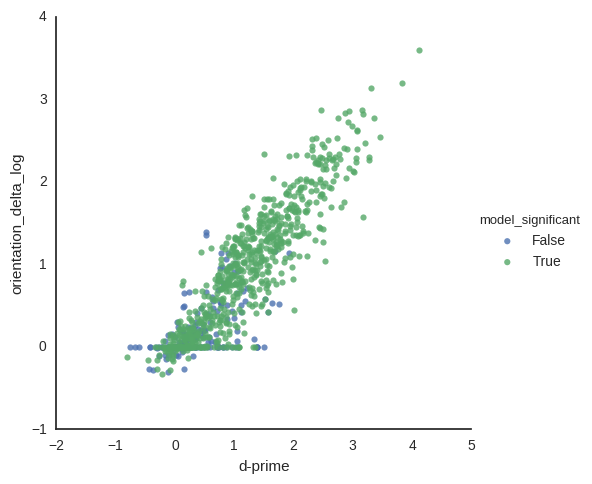

In [31]:
sns.lmplot('d-prime','orientation_delta_log',data=strategy,
           hue='model_significant',
           fit_reg=False,
              )

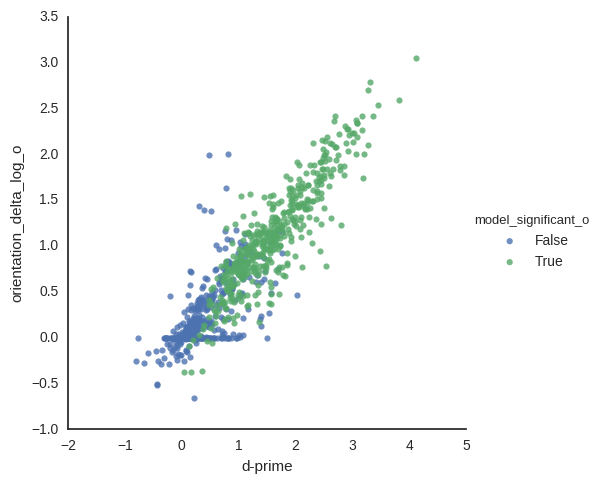

In [32]:
lm = sns.lmplot('d-prime','orientation_delta_log_o',data=strategy,
           hue='model_significant_o',
           fit_reg=False,
              )
# lm.ax.plot()

In [33]:
# good_mouse = 'M258274'
good_mouse = 'M250786'

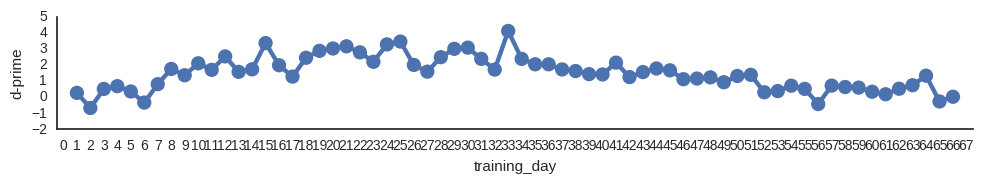

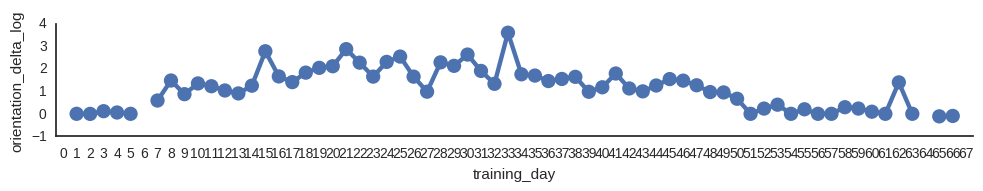

In [34]:
fp = sns.factorplot('training_day','d-prime',data=strategy[strategy['mouse_id']==good_mouse],
#                     col='mouse_id',
#                     col_wrap=2,
                    size=2,
                    aspect=5,
#                     hue='cohort',
#                     col_order=col_order,
              )
fp = sns.factorplot('training_day','orientation_delta_log',data=strategy[strategy['mouse_id']==good_mouse],
#                     col='mouse_id',
#                     col_wrap=2,
                    size=2,
                    aspect=5,
#                     hue='cohort',
#                     col_order=col_order,
              )

In [35]:
min_tr = 50

In [36]:
df = df.merge(
    df[df.trial_type.isin(['go','catch'])].groupby(['mouse_id','training_day']).size().rename('num_tr').reset_index(),
    on=['mouse_id','training_day'],
    how='left',
)

In [37]:
df.head()

,LDT_mode,auto_rewarded,blank_duration_range,blank_screen_timeout,change_color,change_contrast,change_frame,change_image,change_ori,change_size,...,orientation_delta_log,last_water_time,change_time_tr,wait_time,time_since_last_water,time_since_last_water_log,success,failure,contrast,num_tr
0,block,None,"(0.0, 0.0)",False,NaN,NaN,NaN,None,NaN,NaN,...,0.001000,NaN,NaN,0.321877,NaN,NaN,False,False,1.0,168
1,block,True,"(0.0, 0.0)",False,1.0,NaN,132.0,None,180.0,50.0,...,1.954243,NaN,2.213079,2.080386,NaN,NaN,True,False,1.0,189
2,single,None,"(0.5, 0.5)",False,NaN,1.0,NaN,None,NaN,NaN,...,0.001000,NaN,NaN,0.504858,NaN,NaN,False,False,1.0,380
3,None,True,"(0.0, 0.0)",None,1.0,NaN,168.0,None,180.0,50.0,...,1.954243,NaN,2.817447,7.025571,NaN,NaN,False,False,1.0,156
4,None,True,"(0.0, 0.0)",None,1.0,NaN,156.0,None,180.0,50.0,...,1.954243,NaN,2.606169,NaN,NaN,NaN,False,False,1.0,157


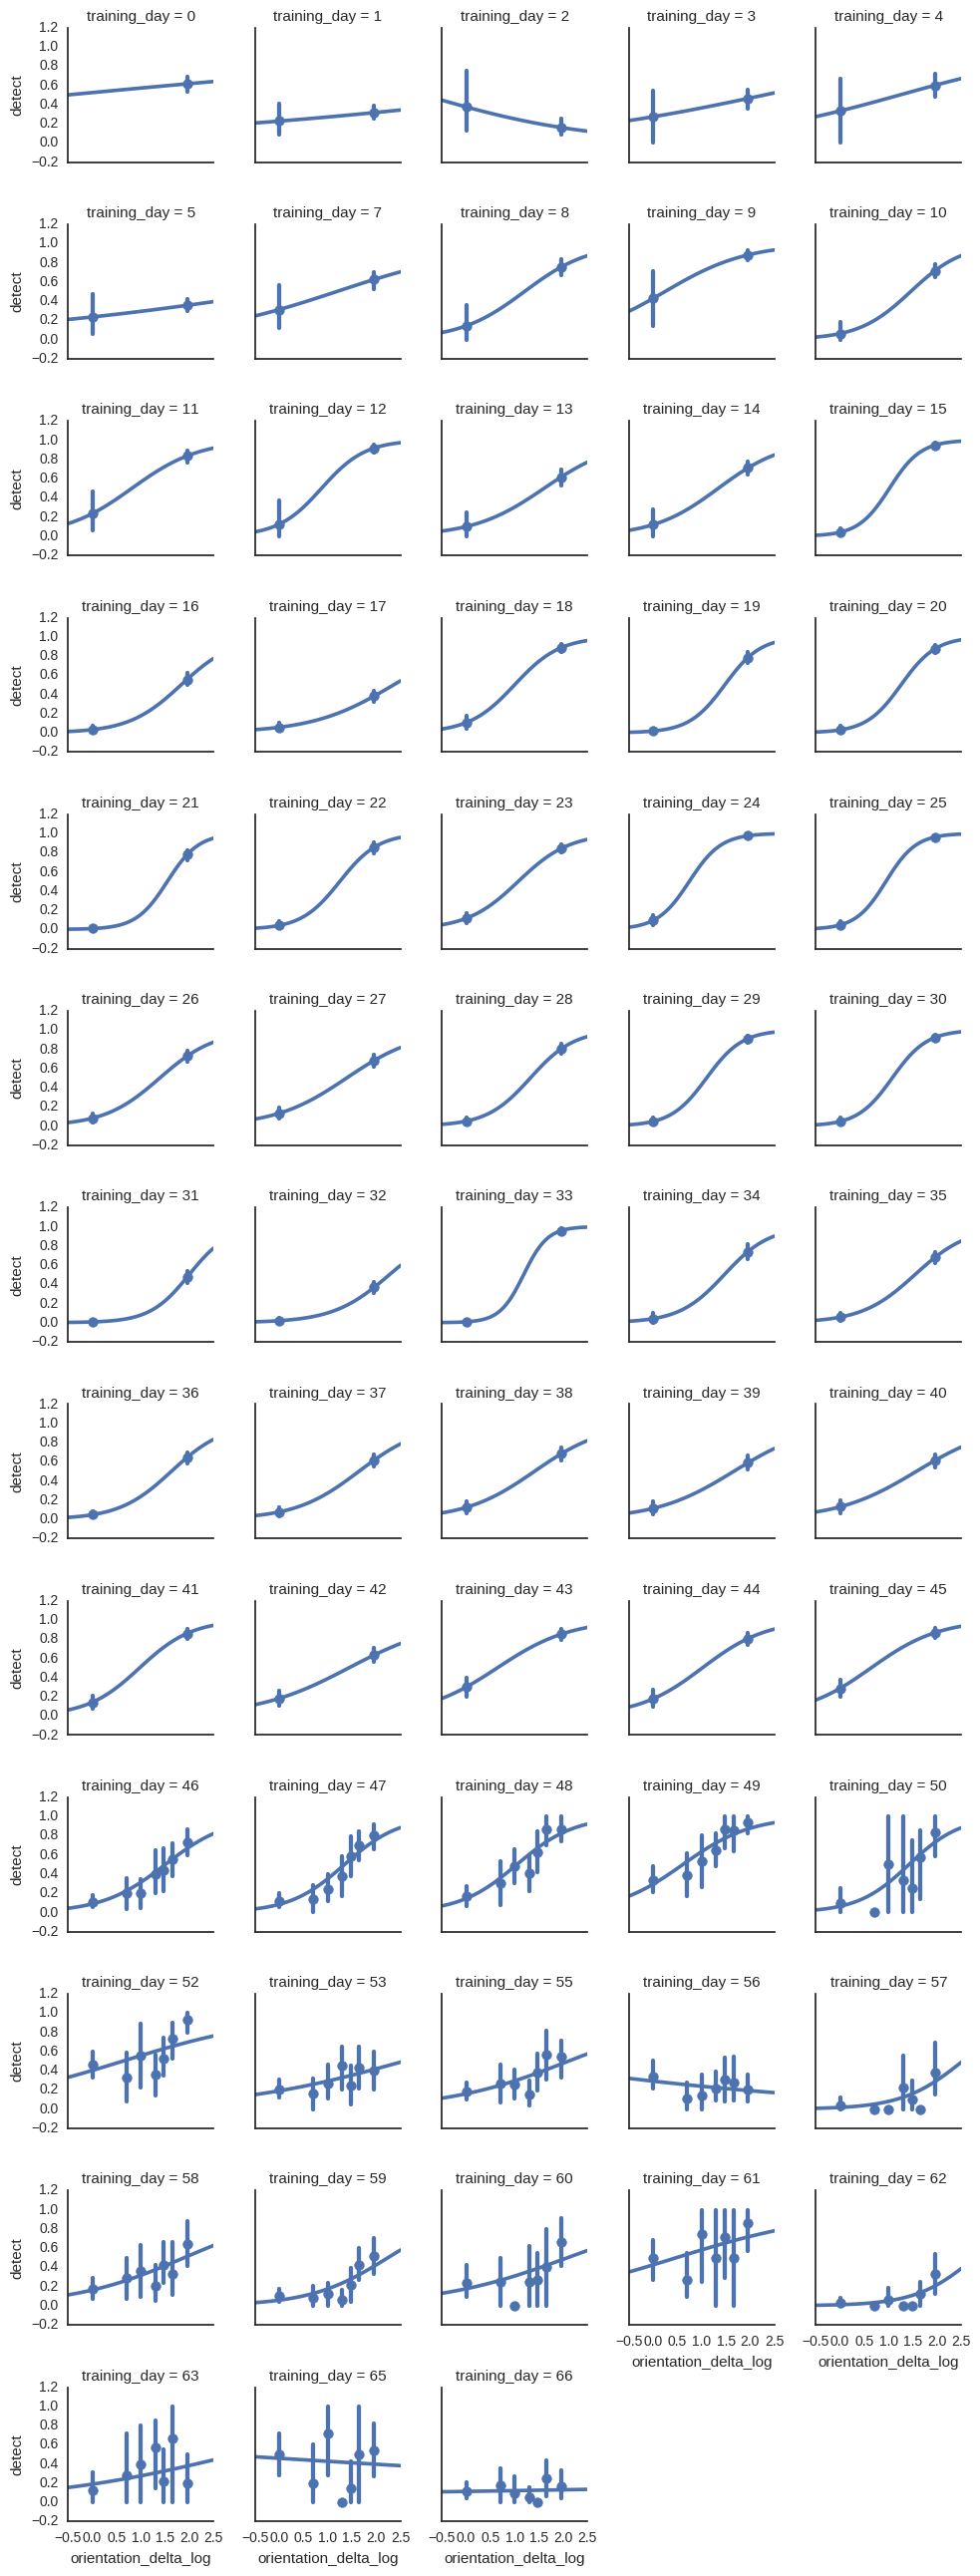

In [38]:
min_tr = 50
data = df[
    (df.mouse_id==good_mouse)
    & df.trial_type.isin(('go','catch'))
#     & (df.training_day ==6)
    & (df.num_tr>min_tr)
]

sns.lmplot('orientation_delta_log','detect',
           data=data,
           logistic=True,
           ci=None,
#            hue='change',
           size=2,
           col='training_day',
           col_wrap=5,
           x_estimator=np.mean,
           x_ci=95,
#            x_bins=np.arange(0,data.cumulative_volume.max(),0.1),
#            y_jitter=0.1,
#            x_jitter=0.05,
#            fit_reg=False,
)
# plt.xlim(0,3)

In [56]:
data['orientation_delta'].unique()

array([ 90.,   0.,  45.,  20.,   5.,  30.,  10.])

In [57]:
mask = (
#     (strategy['prior_failure'].abs()<10)
#     & (strategy['prior_success'].abs()<10)
#     & (strategy['orientation_delta'].abs()<10)
    (strategy['stimulus_control'])
)

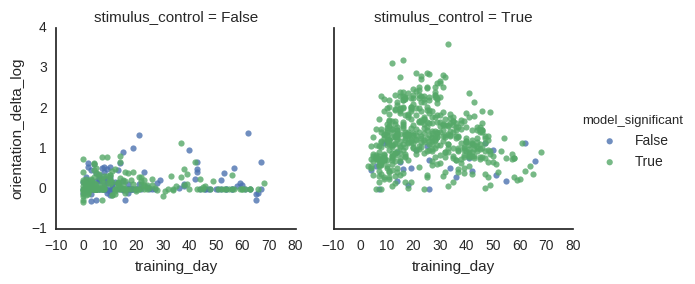

In [58]:
sns.lmplot('training_day','orientation_delta_log',data=strategy,
           col='stimulus_control',
           hue='model_significant',
           fit_reg=False,
           size=3,
              )

In [42]:
strategy.groupby('stimulus_control')['model_significant'].mean()

stimulus_control
False    0.532086
True     0.948819
Name: model_significant, dtype: float64

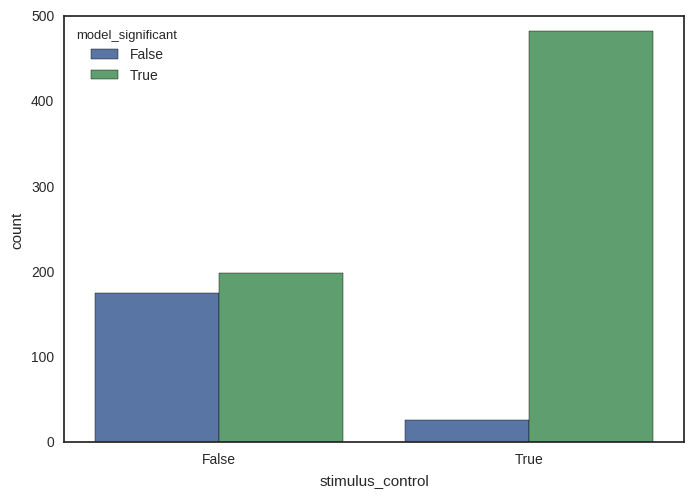

In [43]:
sns.countplot('stimulus_control',data=strategy,hue='model_significant')

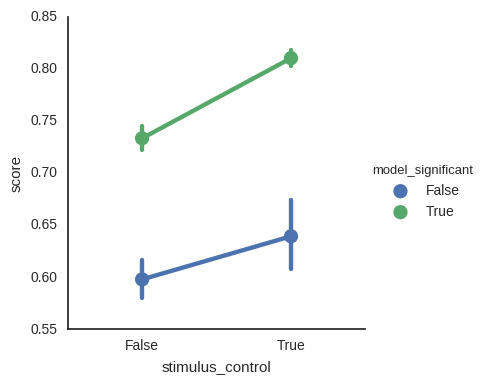

In [44]:
sns.factorplot('stimulus_control','score',data=strategy,
               hue='model_significant',
              )

In [45]:
learned = strategy.groupby('mouse_id')['stimulus_control'].sum()>3

In [46]:
strategy['learned'] = strategy['mouse_id'].map(learned)

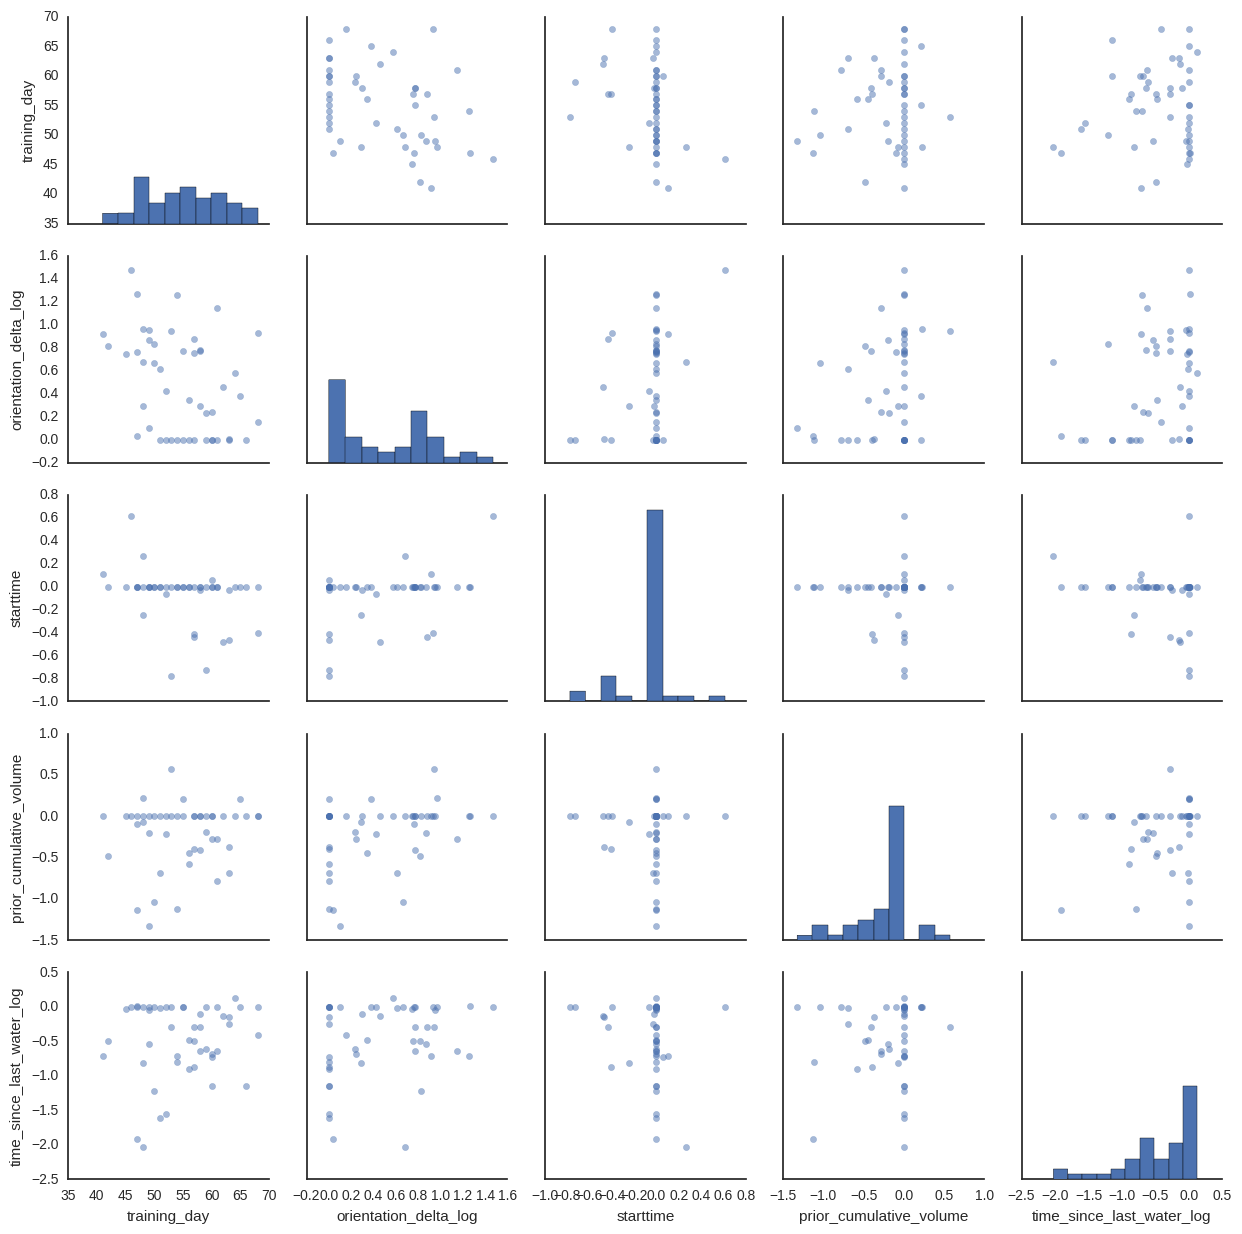

In [47]:
cols = ['training_day','orientation_delta_log','starttime','prior_cumulative_volume','time_since_last_water_log']
g = sns.PairGrid(strategy[strategy.model_significant].dropna(),vars=cols)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter,alpha=0.5)
# g = g.map_lower(plt.hexbin,gridsize=(30,20),bins='log',linewidths=(0,),cmap='Blues')

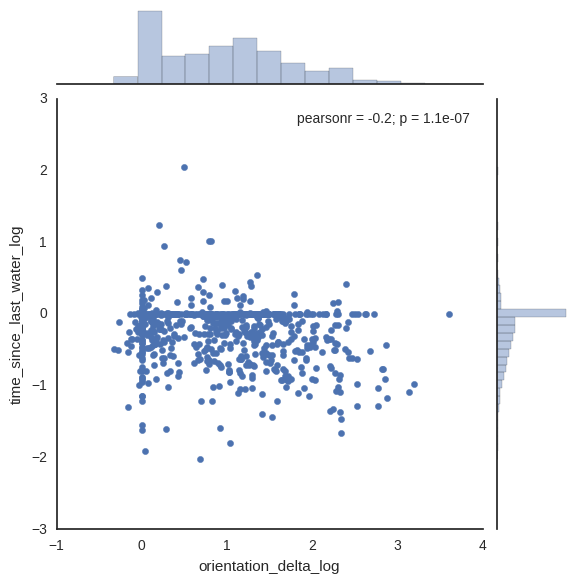

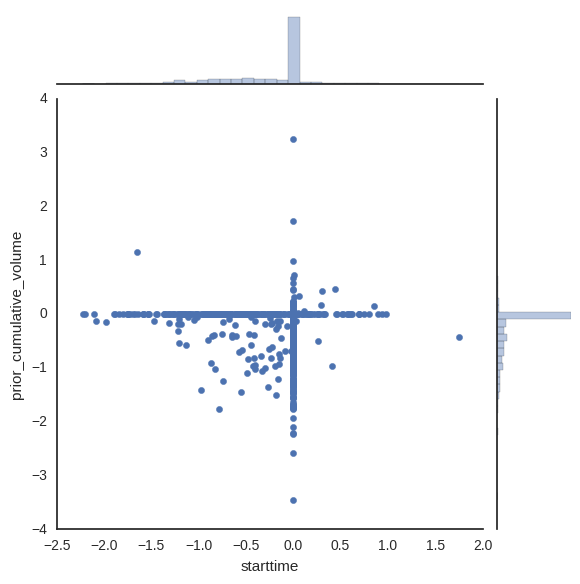

In [48]:
sns.jointplot('orientation_delta_log','time_since_last_water_log',strategy[strategy.model_significant])
sns.jointplot('starttime','prior_cumulative_volume',strategy[strategy.model_significant],stat_func=None)

In [49]:
orientation_mask = (
    (strategy['model_significant']==True)
    & (strategy['num_orientations'] > 2)
    & (strategy['orientation_delta_log'] > 0.8)
#     & (strategy['orientation_delta_log'] > 1)
)
strategy[orientation_mask]

,mouse_id,dayofweek,training_day,Intercept,Intercept_o,contrast,orientation_delta_log,orientation_delta_log_o,p,p_o,...,reporter,sex,tasktype,training_location,userid,waterrestrictionstartdate,stimulus_control,model_significant,model_significant_o,learned
63,M250783,1,53,-0.241007,-0.232854,0.066248,0.943018,1.052960,2.872710e-09,4.626285e-07,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
77,M250783,2,49,-0.007487,0.000000,0.683150,0.869760,0.681169,5.363565e-10,7.139759e-06,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,True,True
78,M250783,2,54,-0.706041,-0.287259,0.904254,1.256332,1.067564,8.819758e-05,5.174996e-02,...,GCaMP6-,Female,None,None,sissyc,2016-08-12,True,True,False,True
117,M250786,0,46,-0.325231,-0.020833,1.169108,1.472869,0.982899,2.612066e-04,2.692055e-05,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
131,M250786,1,47,-0.035985,-0.000050,0.838824,1.267290,0.825895,2.418028e-08,6.156888e-08,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
145,M250786,2,48,-0.001996,0.000000,0.865199,0.965531,0.620632,5.396706e-05,2.910630e-07,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
159,M250786,3,49,0.000701,0.000000,0.872909,0.949108,0.730506,4.542889e-05,3.808272e-04,...,GCaMP6+,Female,None,None,sissyc,2016-08-12,True,True,True,True
286,M258174,0,57,-0.265499,-0.003325,0.395045,0.877303,0.798403,3.475181e-02,1.002101e-01,...,None,Female,None,None,sissyc,2016-08-12,True,True,False,True
327,M258174,3,50,-0.370286,-0.110120,0.249010,0.827081,1.234215,7.870273e-06,1.714205e-02,...,None,Female,None,None,sissyc,2016-08-12,True,True,True,True
330,M258174,3,68,0.000000,0.000000,0.000000,0.929411,1.033122,9.904744e-04,2.414275e-03,...,None,Female,None,None,sissyc,2016-08-12,True,True,True,True


In [50]:
last_water_mask = (
    (strategy['model_significant']==True)
    & (strategy['time_since_last_water_log'] < -1.0)
#     & (strategy['orientation_delta_log'] > 1)
)
strategy[last_water_mask][['cohort','mouse_id','training_day','orientation_delta_log','time_since_last_water_log']]

,cohort,mouse_id,training_day,orientation_delta_log,time_since_last_water_log
4,1.0,M246782,1,0.000000,-1.209970
7,1.0,M246782,14,0.280498,-1.605105
14,1.0,M246782,11,-0.157609,-1.296353
41,1.0,M250783,13,0.841181,-1.021644
62,1.0,M250783,48,0.678913,-2.024892
66,1.0,M250783,66,0.000000,-1.144936
71,1.0,M250783,20,1.150649,-1.047268
83,1.0,M250783,11,0.305656,-1.016776
105,1.0,M250783,51,0.000000,-1.616373
111,1.0,M250786,18,1.827916,-1.101245


In [51]:
def bins(x,steps=20):
    return np.linspace(x.min(),x.max(),steps)

In [52]:
def lookup_factors(mouse,day):
    factors = strategy[(strategy.mouse_id==mouse)&(strategy.training_day==day)]
    assert len(factors)==1
    return factors.iloc[0]

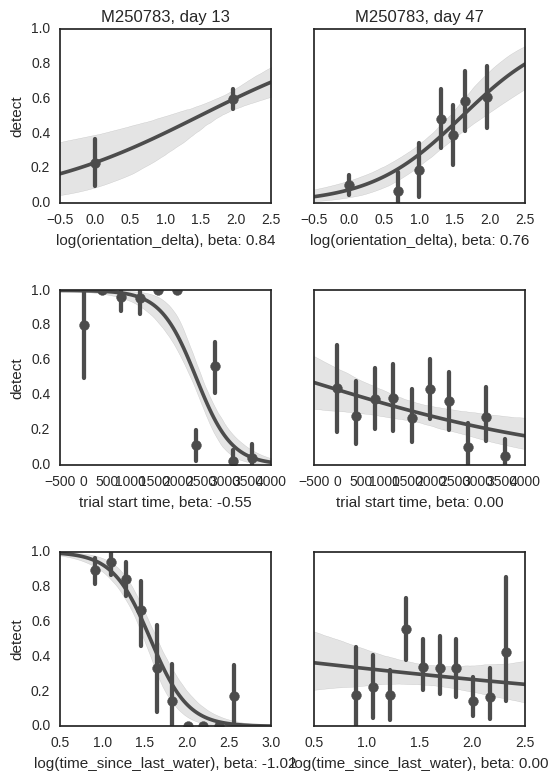

In [53]:
mouse_exemplars = (
    ('M250783',13),
    ('M250783',47),
)


fig,ax = plt.subplots(3,len(mouse_exemplars),sharey=True,figsize=(6,9))
fig.subplots_adjust(hspace=.5)

for ii,(mouse,day) in enumerate(mouse_exemplars):
    factors = lookup_factors(mouse,day)
#     print factors

    mask = (
        (df['mouse_id']==mouse)
        & (df['training_day']==day)
        & df['trial_type'].isin(['go','catch'])
    )

    sns.regplot('orientation_delta_log','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                ax=ax[0,ii],
                color='0.3',
              )
    ax[0,ii].set_ylim(0,1)
    ax[0,ii].set_title('{}, day {}'.format(mouse,day))
    
    xlabel = 'log(orientation_delta), beta: {:0.2f}'.format(factors['orientation_delta_log'])
    ax[0,ii].set_xlabel(xlabel)
    
    sns.regplot('starttime','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                x_bins=bins(df[mask]['starttime'],steps=10),
                ax=ax[1,ii],
                color='0.3',
               )
    xlabel = 'trial start time, beta: {:0.2f}'.format(factors['starttime'])
    ax[1,ii].set_xlabel(xlabel)
    
    sns.regplot('time_since_last_water_log','detect',df[mask],
                logistic=True,
                x_ci=95,
                x_estimator=np.mean,
                x_bins=bins(df[mask]['time_since_last_water_log'],steps=10),
                ax=ax[2,ii],
                color='0.3',
               )
    xlabel = 'log(time_since_last_water), beta: {:0.2f}'.format(factors['time_since_last_water_log'])
    ax[2,ii].set_xlabel(xlabel)
    
    if ii>0:
        [a.set_ylabel('') for a in ax[:,ii]]



In [54]:
strategy = pd.merge(strategy,cohort_assignment,on='mouse_id',how='left')

In [55]:
fp = sns.factorplot('orientation_delta_log','group',data=strategy[strategy.model_significant],size=6)
fp.ax.axvline(0.0,color='0.5',zorder=-1)
fp = sns.factorplot('time_since_last_water_log','group',data=strategy[strategy.model_significant],size=6)
fp.ax.axvline(0.0,color='0.5',zorder=-1)

ValueError: Could not interpret input 'group'

In [60]:
strategy[strategy.model_significant]['orientation_delta_log'].min()

-0.33032379901285586

In [61]:
data = strategy[strategy.model_significant]

In [62]:
strategy['baselineweight'].astype(float)

KeyError: 'baselineweight'

In [ ]:
strategy['baselineweight'] = strategy['baselineweight'].astype(float)

In [63]:
wdata = (
    strategy[strategy.model_significant]
    .groupby(['group','mouse_id'])[['baselineweight','orientation_delta_log']]
    .max()
    .reset_index()
)
sns.lmplot('baselineweight','orientation_delta_log',
           data=wdata,
#            hue='group',
#            fit_reg=False,
#            x_estimator=np.mean,
          )
sns.lmplot('baselineweight','orientation_delta_log',
           data=wdata,
           hue='group',
           fit_reg=False,
#            x_estimator=np.mean,
          )

KeyError: 'group'

In [ ]:
sns.lmplot('baselineweight','time_since_last_water_log',
           data=strategy[strategy.model_significant])

/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/seaborn/linearmodels.py:303: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return (a_prime + a_mean).reshape(a.shape)


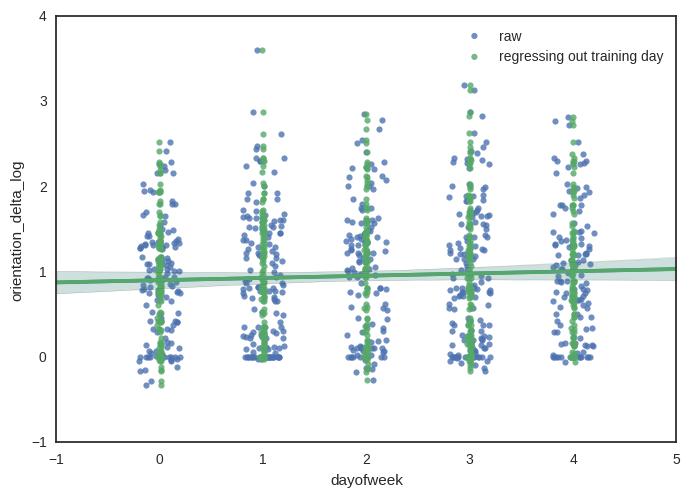

In [64]:
sns.regplot('dayofweek','orientation_delta_log',
            data=strategy[strategy.model_significant],
#            x_estimator=np.mean,
#            x_partial='training_day',
           x_jitter=0.2,
            label='raw'
          )
sns.regplot('dayofweek','orientation_delta_log',
            data=strategy[strategy.model_significant],
#            x_estimator=np.mean,
            x_partial='training_day',
#            x_jitter=None,
            label='regressing out training day'
          )
plt.legend()

In [65]:
mask = (
    df.trial_type.isin(['go','catch'])
    & (df.cohort=='Cohort 1')
    & df.mouse_id.isin(['M250783','M250786','M258196','M258174'])
)

with sns.color_palette('Blues'):
    sns.lmplot('orientation_delta_log','detect',data=df[mask],
               logistic=True,
               hue='contrast',
               col='contrast',
               row='mouse_id',
               x_estimator=np.mean,
               ci=False,
#                col_wrap=2,
#                col='training_day',
              )

/home/justink/.conda/envs/braintv_behav/lib/python2.7/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [66]:
df.columns

Index([                 u'LDT_mode',             u'auto_rewarded',
            u'blank_duration_range',      u'blank_screen_timeout',
                    u'change_color',           u'change_contrast',
                    u'change_frame',              u'change_image',
                      u'change_ori',               u'change_size',
                     u'change_time',                     u'color',
                   u'computer_name',         u'cumulative_volume',
                            u'date',                       u'day',
                       u'dayofweek',                 u'delta_ori',
               u'distribution_mean',                  u'endframe',
                        u'filename',                  u'filepath',
                            u'hour',                     u'index',
                    u'inital_color',           u'inital_contrast',
                u'initial_contrast',             u'initial_image',
                     u'initial_ori',              u'initial_si

In [67]:
n_contrasts = df.groupby(['mouse_id','training_day'])['contrast'].nunique().reset_index()

In [68]:
mask = (~pd.isnull(strategy.contrast))

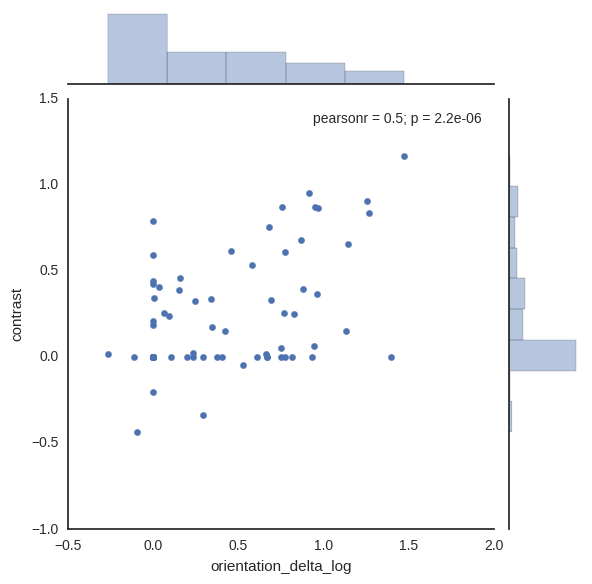

In [69]:
sns.jointplot('orientation_delta_log','contrast',data=strategy[mask])

In [70]:
strategy[mask].groupby('mouse_id')[['orientation_delta_log','contrast']].mean()

,orientation_delta_log,contrast
mouse_id,,
M250783,0.479761,0.315520
M250786,0.398517,0.209610
M258174,0.383273,0.206318
M258196,0.256185,0.114751


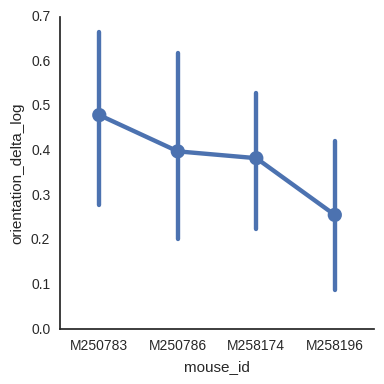

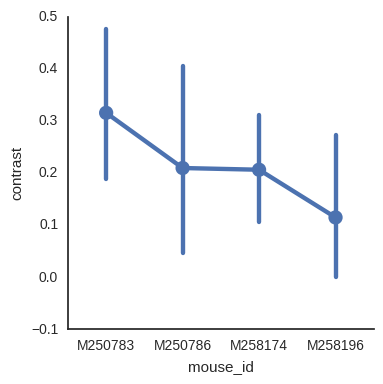

In [71]:
sns.factorplot('mouse_id','orientation_delta_log',data=strategy[mask])
sns.factorplot('mouse_id','contrast',data=strategy[mask])